# Q1: Load all data and vectorize it with tf-idf vectorization. 

In [16]:
import numpy as np
import csv
import pandas as pd
df = pd.read_csv("D:/UIC/IDS 566 ATA/Assignment/HW3/songdata.csv/songdata.csv", header=0, delimiter=",", quoting=0)
#csv_data=open("D:/UIC/IDS 566 ATA/Assignment/HW2/Tweets.csv")
#data = csv.reader(csv_data)
df.head(5)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

data_to_trans = df.text.tolist()
vect = TfidfVectorizer(binary = False, min_df = 50)

X = vect.fit_transform(data_to_trans)
print(X.shape)
print(X.toarray())

(57650, 5749)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


# Q2: Apply a clustering algorithm with 3 clusters and find top 5 closest documents to each cluster’s centroid. Analyze your result.

In [15]:
import numpy as np
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit_predict(X)
dist = kmeans.transform(X)
for i in range(dist.shape[1]):
    test = np.array(dist[:,i])
    index = np.argsort(test)[:5]
    print("Cluster: %d"%i,"\n",df.text.iloc[index],"\n")

Cluster: 0 
 24053    Domine Deus, Rex coelestis,  \nDeus Pater omni...
34925    See you've caught me in a coma  \nAnd I don't ...
41988    Do you remember, the first time you fell in lo...
26314    I know you got a different picture in mind  \n...
34941    Gonna find a way to cure this loneliness  \nYe...
Name: text, dtype: object 

Cluster: 1 
 24053    Domine Deus, Rex coelestis,  \nDeus Pater omni...
16477    [Puffy]  \nAll I want is somebody who's gonna ...
41988    Do you remember, the first time you fell in lo...
16731    I don't understand  \nI do all this for you  \...
15197    [Chorus:]  \nLookin' for love in all the wrong...
Name: text, dtype: object 

Cluster: 2 
 24053    Domine Deus, Rex coelestis,  \nDeus Pater omni...
34925    See you've caught me in a coma  \nAnd I don't ...
31385    [Scratched sample] - "I'm the man!"  \n  \nI s...
41588    Combeferre:  \nAt Notre Dame  \nThe sections a...
37402    In the calling out to one another  \nOf the lo...
Name: text, dtype: o

The three clusters that are formed have different set of documents. With the top five documents close to the centroids of these clusters, we see that the clusters are not very well separated. They have a small overlap. For example, the document "Do you remember, the first time you fell in lo..." is present in both the first and the second cluster and "Domine Deus, Rex coelestis,  \nDeus Pater omni..." is present in all three clusters.

# Q3: Reduce the dimension to 50 components using LSA and report top 5 features per component. Analyze your result. 

In [18]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(50)
lsa_data = lsa.fit_transform(X)

vocab = np.array(vect.get_feature_names())
for i in range(lsa_data.shape[1]):
    order = np.abs(lsa.components_[i].argsort())[::-1]
    print(vocab[order[:5]])


['you' 'the' 'to' 'and' 'me']
['you' 'me' 'love' 'baby' 'don']
['she' 'her' 'me' 'girl' 'baby']
['he' 'you' 'his' 'him' 'man']
['it' 'he' 'don' 'we' 'yeah']
['love' 'my' 'me' 'oh' 'baby']
['we' 'he' 'love' 'his' 'our']
['oh' 'baby' 'yeah' 'the' 'love']
['love' 'it' 'is' 'the' 'do']
['oh' 'my' 'la' 'it' 'was']
['la' 'me' 'want' 'to' 'da']
['oh' 'want' 'to' 'me' 'don']
['your' 'll' 'be' 'will' 'gonna']
['want' 'to' 'my' 'don' 'no']
['baby' 'be' 'll' 'christmas' 'the']
['no' 'don' 'they' 'll' 'know']
['baby' 'is' 'it' 'can' 'the']
['yeah' 'be' 'll' 'do' 'will']
['my' 'do' 'don' 'if' 'know']
['and' 'christmas' 'they' 'your' 'baby']
['yeah' 'your' 'be' 'was' 'll']
['yeah' 'don' 'go' 'know' 'hey']
['no' 'do' 'go' 'let' 'was']
['no' 'christmas' 'want' 'it' 'one']
['let' 'christmas' 'go' 'got' 'girl']
['christmas' 'can' 'on' 'your' 'no']
['gonna' 'do' 'was' 'hey' 'your']
['do' 'no' 've' 'and' 'got']
['na' 'is' 'this' 'that' 'hey']
['come' 'will' 'on' 'back' 'they']
['na' 'hey' 'they' 'it' 'ang

By performing LSA and finding the first 5 features of each of the 50 components, it is seen that the songs mostly belong to romantic genre. Most of the features are mono-syllable words that include most common words like 'to','you','will','is','be','so','up','do' and so on.

# Q4: Run a clustering algorithm with 2-10 clusters on low dimension features and select the best number of clusters using elbow method. 

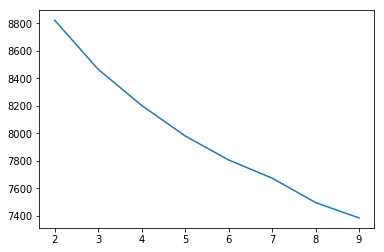

In [19]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
inertia = []
for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit_predict(lsa_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 10), inertia)

From the elbow curve, we can see that the 6 is the best number of clusters 

# Q5: Use the best number of clusters that you have found and find top 5 closest documents to each cluster’s centroid. Compare your result with Q2 

In [22]:
kmeans = KMeans(6)
kmeans.fit_predict(lsa_data)
dist = kmeans.transform(lsa_data)
print("Top 5 closest documents to -\n")
for i in range(dist.shape[1]):
    test = np.array(dist[:,i])
    index = np.argsort(test)[:5]
    print("Cluster %d :"%i,"\n\n",df.text.iloc[index],"\n")

Top 5 closest documents to -

Cluster 0 : 

 47082    Now get the fuck up off me nigga  \n  \nAs I, ...
8546     The sun rises and sets on time every day of th...
42490    I'm no stranger to deception  \nI have lied an...
17348    I am you are me  \nGood woman said you gotta b...
53460    One week of every year is designated National ...
Name: text, dtype: object 

Cluster 1 : 

 14407    Johnny has a problem  \nJohnny is out of contr...
19674    There was a little boy once upon a time  \nWho...
43924    Sun comes up Sunday morn  \nOn the little chur...
33980    Give him a soft guitar to play what he choose ...
25799    Now There's a man you'll hear about  \nMost an...
Name: text, dtype: object 

Cluster 2 : 

 13980    There she stands, this lovely creature  \nTher...
28312    (Original by Robyn Hitchcock)  \n  \nI used to...
35289    Some ladies love diamonds  \nFast cars and fre...
36463    She sat on the pavement  \nAs I pulled in the ...
54129    Grace  \nShe takes the blame  \nSh

The clusters are well separated in this case as compared to the clusters in question 2. The top 5 documents close to each of the centroids are very closely related to each other. The cluster 4 clearly has army and war related songs, while the cluster 2 has songs with 'woman' as the theme 

# Q6: Reduce dimension to 2 components and find 3 clusters in data and plot them using a scatter plot with different colors. Analyze your result. 

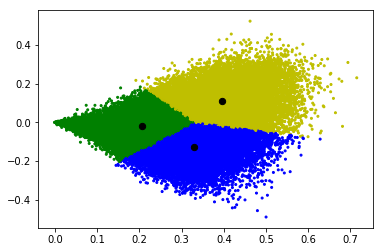

In [23]:
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
lsa = TruncatedSVD(2)
Z = lsa.fit_transform(X)
colors = np.array(['y', 'g', 'b'])
kmeans = KMeans(3, init = 'random', random_state = 10000, n_init = 1)
clusters = kmeans.fit_predict(Z)
plt.scatter(Z[:, 0], Z[:, 1], 4, colors[clusters])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 40,'k')

Large part of the data belong with one cluster. While, the rest are distributed with the other two - blue and dark green - clusters. We can see that the centroids of these clusters are closer to each other than they are to the third cluster.